# Supervised learning - decision tree

Het belangrijkste onderwerp in deze Jupyter notebook is de Decision Tree classifier en regressor. Decision Trees behoren tot de categorie supervised learning.

Decision Trees (Ned: beslisbomen) zijn uiterst intuïtieve manieren om objecten te classificeren of te labelen: je stelt eenvoudig een reeks vragen die zijn ontworpen om op de classificatie in te zoomen. 
Bijvoorbeeld om een dier te classificeren, kun je vragen stellen, zoals (deels)in onderstaande figuur staat, om tot een resultaat te komen:

<div>
<img src="./images/decision_tree_animal_classification.jpg" alt="Example Animal Classification" style="max-width: 100%; max-height: 100%"/>
</div>

De binaire splitsing maakt dit uiterst efficiënt. Zoals altijd is het echter de kunst *om de juiste vragen te stellen*. Dit is waar het algoritmische proces van pas komt: bij het trainen van een decision tree classificator kijkt het algoritme naar de *features* en beslist welke vraag (of "splitsingen") de meeste informatie bevatten.

Decision Trees zijn ook de fundamentele componenten van `Random Forest`, die, op het moment, tot een van de krachtigste beschikbare algoritmen voor machine learning behoren.

Indeling notebook:
1. **Decision Tree voor classificatie**
    - Voorbeeld hoe het algoritme te trainen, te visualiseren en er voorspellen mee te maken zijn.
    - Regularizeren hyper parameters om *overfitting* te vermijden.
    - Voorbeeld Iris dataset met prestaties van de decision tree classificator uit scikit-learn.
2. **Decision Tree voor regressie**
    - Voorbeeld met een kwadratische dataset.
    - Regularizeren hyper parameters om *overfitting* te vermijden.
    - Oefening.
3. **Opdrachten classiceren met Decision Tree**
    - Handgeschreven cijfers 0 t/m 9 classificeren.
    - Tumors classificeren (goedaardig of kwaadaardig)


## Wat ga je doen?
Doorloop en voeruit (*Run* of *Shift+Enter*) de Python voorbeelden en doe de oefeningen en opdrachten. Kijk niet te snel in de voorbeeldoplossingen Jupyter notebook, maar probeer het eerst zelf, of samen met jouw teamgenoten.

Gebruik het materiaal voor jouw casus met Decision Tree modellen.

## Referenties

1. Geron, Aurelien (2022), [Decision Trees notebook](https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb)
2. Voorbeelden zijn een bewerking van de [scikit-learn tutorial](https://github.com/jakevdp/sklearn_tutorial) van Jack Vanderplas.
3. Scikit-Learn Decision Tree: [scikit-learn Decision Tree documentation](https://scikit-learn.org/stable/modules/tree.html)
4. Meer weten over `scikit-learn`:  [Scikit-learn
Machine Learning in Python](https://scikit-learn.org/stable/)

Zie Scikit-learn documentatie over classificatie metrieken:
- **recall score**: [metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall#sklearn.metrics.recall_score)
- **precision score**: [metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision_score#sklearn.metrics.precision_score)
- **classification report**: [metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report)
---

In [1]:
# library checks
# Python >= 3.7
import sys
assert sys.version_info >= (3, 7)
                            

# scikit-learn >= 1.0.1
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# graphviz
# conda install graphviz

In [2]:
# convenience functions and configuration

%matplotlib inline

import sys
import os
from pathlib import Path
from packaging import version
import matplotlib.pyplot as plt
import pandas as pd

#ignore deprecation warnings:
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# Create the `images/training_trees_models` folder
IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    
# Excel CSV-file
def load_csv_pd_data(path, filename, 
                     names=None, 
                     delim_whitespace=False
                    ):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV file `filename`,
           stored in a folder `path`.
           @names: header-names of columns
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(csv_path)
    return pd.read_csv(csv_path,
                       delim_whitespace=delim_whitespace,
                       names=names
                      )

### Voorbeeld Decision Tree voor classificatie
Het volgende voorbeeld maakt gebruik van de Decision Tree classifier uit scikit-learn, dat we gaan toepassen op de Iris dataset.

dataset: `iris`  uit scikit-learn

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)

# features: petal-length and petal-width
feature_names=[
    "petal length (cm)",
    "petal width (cm)"
]

X_iris = iris.data[feature_names].values
y_iris = iris.target

# make and train the decision classifier
tree_clf = DecisionTreeClassifier(
    max_depth=2, 
    random_state=42
)
tree_clf.fit(X_iris, y_iris)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [4]:
# show the parameters of the Decision Tree classifier
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

De decition tree kan ook in Graphviz-indeling gexporteerd worden met behulp van de `export_graphviz` exporter in `sklearn.tree`. 

De binaire bestanden van graphviz en het python-pakket moeten dan wel geinstalleerd worden met Terminal commando: `conda install python-graphviz`, of, van pypi-repository met Terminal commando: `pip install graphviz`.

Vervolgens gebruik je het `dot` comando-tool uit het GraphViz-pakket om het `.dot` bestand naar verschillende formaten te converteren, zoals PDF of PNG.

Het resultaat is het volgende plaatje:
![iris_tree](./images/decision_trees/iris_tree.png)

In [5]:
from sklearn.tree import export_graphviz

# create a graphical specification .dot file:
export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# In a Terminal, execute dot command: 
#
#      dot -Tpng iris_tree.dot -o iris_tree.png
#
# to make a PNG-file of the .dot-file.

Details om van het grafiekdefinitiebestand `iris_tree.dot` een `iris_tree.png` bestand te maken in Jupyter Lab:
- open een Terminal
    - ga naar de lokatie van de `iris_tree.dot` file met de `cd` terminal commando.
    - type in het `dot` commando: `dot -Tpng iris_tree.dot -o iris_tree.png`
        >Als je een Python virtuele omgeving gebruikt, moet je die wel eerst activeren.
- open de image `iris_tree.png` in Jupyter lab.

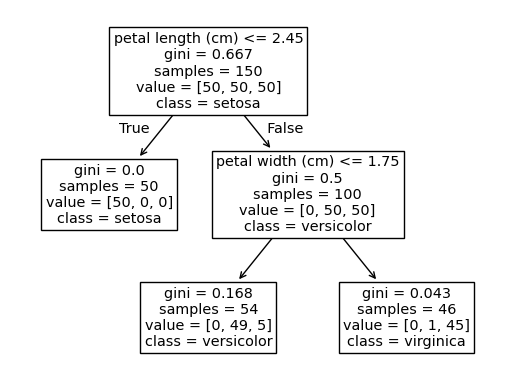

In [6]:
# 2022-1212 PP: recently I discovered sklearn.tree 
# has an built-in tree plot.
# Source: https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
plot = tree.plot_tree(
    decision_tree=tree_clf,
    feature_names=feature_names,
    class_names=iris.target_names
)

#### Maken van een voorspelling met het getrainde model

Laten we eens kijken hoe de tree voorspellingen doet aan de hand van de volgende decision tree plot.

Stel, je vindt een Irisbloem en je wilt deze classificeren. 

Je begint bij de *root* knooppunt (depth 0, bovenaan), dit knooppunt vraagt of de bloembladlengte van de bloem kleiner is dan 2,45 cm. Als dat zo is, ga je naar beneden naar de linker onderliggende node van de *root* (depth 1, links). In dit geval is het een bladknooppunt, d.w.z. het heeft geen onderliggende nodes, die vragen kunnen stellen: je kijkt vervolgens  naar de voorspelde klasse van dat bladknooppunt en de decision tree voorspelt dat jouw bloem een Iris Setosa is (class=setosa).

Stel, dat je een Irisbloem hebt, waarvan de bloembladlengte langer is dan 2.45 cm. Dan ga je na de *root* knooppunt naar beneden naar de rechter onderliggende knooppunt van de *root* (depth 1, rechts). Deze is géén bladknoopunt, dus de knoop stelt een andere vraag: is de bloembladbreedte kleiner dan 1,75 cm? Als dat zo is, dan is jouw bloem hoogstwaarschijnlijk een Iris Versicolor (diepte 2, links). Zo niet, dan is het waarschijnlijk een Iris Virginica (diepte 2, rechts). Zo eenvoudig is het.

In [7]:
# test one new flower to confirm...
new_flower = [2.1, 1.5]  # -> setosa [0]
#new_flower = [2.7, 1.2]  # -> versicolor [1]
#new_flower = [2.7, 2.1]  # -> virginica [2]

tree_clf.predict([new_flower])

array([0])

In onderstaande code maken we voorspellingen voor een groot aantal Irisboemen (`X_iris_all`) en plotten de resultaten inclusief de `max_depth`-waarde.

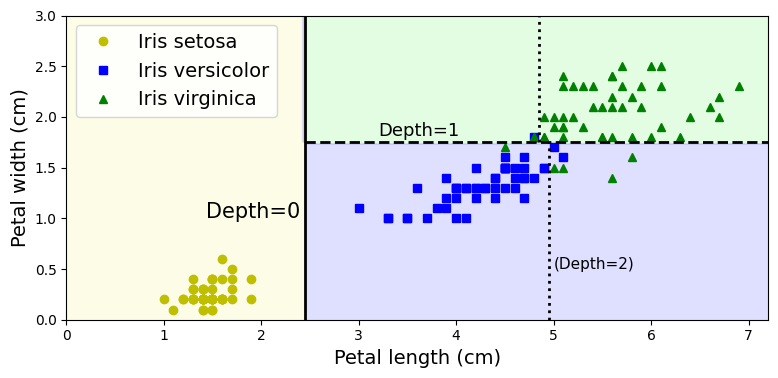

In [8]:
# from https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

# create data for Iris flowers...
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
#print(X_iris_all)

# make predictions
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

# visualize the results
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

# save figure
save_fig("decision_tree_decision_boundaries_plot")

# show figure in notebook
plt.show()

### Regulariseren van de Decision Tree

Decision Trees maken heel weinig aannames over de trainingsgegevens - in tegenstelling tot bijvoorbeeld lineaire regressiemodellen, die ervan uitgaan dat de gegevens lineair zijn. Als de structuur van de tree niet wordt ingeperkt, zal het zich aanpassen aan de trainingsgegevens, waardoor het zeer nauwkeurig past - hoogstwaarschijnlijk dat dan *overfitting* plaatsvindt!

>Decision Tree is een zogenaamde **niet-parametrisch model**, en, omdat het aantal parameters niet wordt bepaald voorafgaand aan de training, is het model vrij om dicht bij de data te blijven.

>Een **parametrisch model**, zoals een lineair regressiemodel, heeft daarentegen een vooraf bepaald aantal parameters, dus de mate van vrijheid is beperkt, waardoor het risico op *overfitting* wordt verkleind (maar het risico op *underfitting* wordt vergroot).

Om overfitting van de trainingsgegevens te voorkomen, moet je de vrijheid van de Decision Tree beperken tijdens de training. Dit heet **regularisatie**. 

De hyperparameters voor regulatie zijn afhankelijk van het gebruikte algoritme, maar over het algemeen kun je op zijn minst de maximale diepte van de decision tree beperken. In Scikit-learn wordt dit bepaald door de `max_depth` hyperparameter. De standaardwaarde is `None`, wat onbeperkt betekent. Het verminderen van `max_depth` zal het model regulariseren en zo het risico van *overfitting* verkleinen.

De klasse `DecisionTreeClassifier` heeft een paar andere parameters die op dezelfde manier de vorm van de beslissingsboom beperken, zoals `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `max_features`. Het verhogen van `min_*` hyperparameters en het verminderen van `max_*` hyperparameters zal het model regulariseren. 

Zie de help-informatie over klasse `DecisionTreeClassifier` betreffende de betekenis van de hyperparameters.

---
### Diepgang: Hoe werkt een Decision Tree achter de schermen?

Het basis idee achter een Decision Tree algoritme is als volgt:

1. Selecteer het beste attribuut met behulp van *Attribute Selection Measures (ASM)* om de waarnemingen te splitsen.
2. Maak van dat attribuut een decision node (beslissingsknooppunt) en verdeel de dataset in kleinere subsets.
3. Start het opbouwen van de tree door dit proces recursief te herhalen voor elk knooppunt (child node) totdat aan één van de voorwaarden is voldaan:
    - Alle tuples behoren tot dezelfde attribuutwaarde.
    - Er zijn geen resterende attributen meer.
    - Er zijn geen waarnemeningen (*features*) meer.
    
![how_it_works](./images/decision_trees_how_it_works.png)

#### Attribute Selection Measures (ASM)

*Attribute Selection Measures (ASM)* is een heuristiek voor het selecteren van het splitsingscriterium dat gegevens op de best mogelijke manier verdeelt.

ASM geeft een rang aan elke *feature* (of kenmerk). Dan vinden er splitsingen plaats. De meest populaire selectiemaatregelen zijn *Information Gain*, *Gain Ratio* en *Gini Index*. Uitleg valt buiten de scope van deze module. De termen kan je wel tegenkomen, bijv. via de help-informatie. Zie (Geron 2022) voor meer informatie.

Gelukkig wordt al dit rekenwerk intern gedaan door de Scikit-learn klasse `DecisionTreeClassifier`!

De parameters van een getrainde `DecionTreeClassifier` model kan je opvragen met de volgende code:

In [9]:
# show the parameters of the trained model
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

---
## Optioneel: interactive manier om de depth-waarde in een Decision Tree te wijzigen

De `max_depth` speelt, zoals je hierboven gezien hebt, een grote rol in het fine-tunen van een Decision Tree. We gebruiken `ipywidgets` om een interactieve plot te maken van een Decision Tree van verschillende diepte waarden.

De functie `visualize_tree()` is een helper-functie.

In [10]:
# helper function to visualize a tree.

import matplotlib.pyplot as plt
import numpy as np

def visualize_tree(estimator, X, y, boundaries=True, xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)  # org: alpha=0.2
    plt.clim(y.min(), y.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-r')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-r')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())
 

In [11]:
# example of decision tree with parameter max_depth
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interactive

# helper function
def interactive_tree(depth=1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    visualize_tree(clf, X, y)
    plt.show()


# create dataset
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

interactive(interactive_tree, depth=(1, 5))

interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

Verander de positie van de schuifregelaar en merk op dat bij elke toename in diepte (*depth*), elk knooppunt in tweeën wordt gesplitst, behalve die knooppunten die slechts één enkele klasse bevatten. Het resultaat is een snelle niet-parametrische classificatie en kan in de praktijk zeer nuttig zijn.

---
---
## Decision Tree voor regressie

Decision Trees zijn ook in staat om regressie taken uit te voeren.

We bouwen een regressie decision tree met behulp van Scikit-learn klasse `DecisionTreeRegressor`, we trainen deze op een kwadratische dataset met random ruis, en met `max_depth=2`:

In [12]:
from sklearn.tree import DecisionTreeRegressor

#generate dataset for regression (quadratic dependency)
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

# create an initial, untrained model
tree_reg = DecisionTreeRegressor(
    max_depth=2, 
    random_state=42
)
# train the model
tree_reg.fit(X_quad, y_quad)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [13]:
from sklearn.tree import export_graphviz

# create a graphical specification .dot file:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

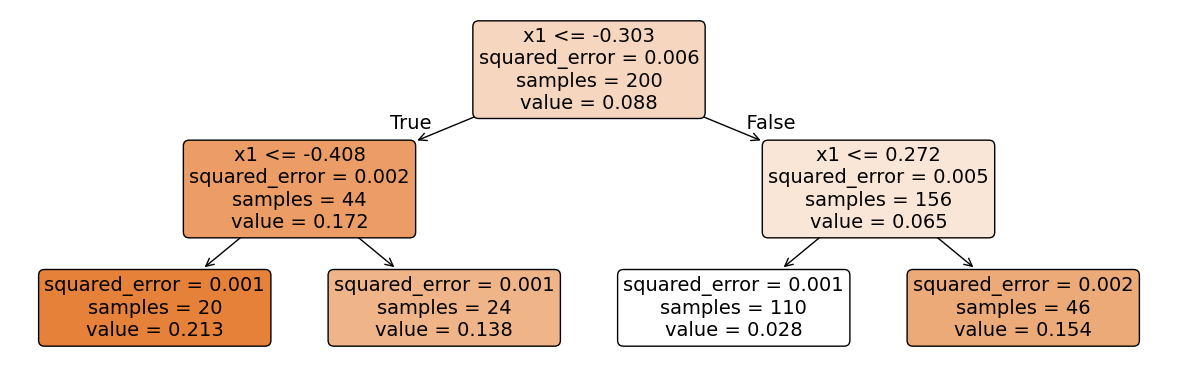

In [14]:
# 2022-1212 PP: inline tree plot
# Source: https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

plt.figure(figsize=(12, 4))  # size of figure
plot = tree.plot_tree(
    decision_tree=tree_reg,   # regressor
    feature_names=["x1"],
    fontsize=14,
    filled=True,
    rounded=True
)
save_fig("regression_tree_plot")
plt.show()

Via het `dot`-commando zie je in volgende figuur de resulterende tree:

![regression_tree](./images/decision_trees/regression_tree.png)

NB. `dot` Terminal commando: `dot -Tpng regression_tree.dot -o regression_tree.png`

De tree lijkt erg op de eerder gebouwde classificatie tree. Het belangrijkste verschil is dat in plaats van een klasse in elk knooppunt te voorspellen, het een waarde voorspelt.

Wil je bijvoorbeeld een voorspelling doen voor een nieuwe instantie met x=0,6. Je doorkruist de boom vanaf de root en bereikt uiteindelijk de bladknoop die een waarde voorspelt van 0,154.

In [15]:
# prediction for X=0.6: 
y_pred = tree_reg.predict([[0.6]])
print(f"{y_pred[0]:0.3f}")

0.154


In [16]:
# regularize hyperparameter max_depth -> max_depth=3
tree_reg2 = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)
# train the model
tree_reg2.fit(X_quad, y_quad)
# make prediction
y_pred = tree_reg2.predict([[0.6]])
print(f"prediction for x=0.6 is {y_pred}")

# validation of trained model
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_reg, X_quad, y_quad, cv=10)
print(f"cross validation score:{score[0]} ({score[0]*100:0.0f}%)")

prediction for x=0.6 is [0.20267283]
cross validation score:0.5118746675551797 (51%)


---